<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis_8_20_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [5]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [6]:
# while(TRUE){}

In [7]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [8]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

In [9]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: Y


Enter a number between 1 and 2, or enter 0 to exit.


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e6fe7f2b805805fcf7cbb79c1381caf8&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVjVxcUZrR0RjWEVRakJCdm1aMlpxcGE5RFVMV2JUeWs3STJXUDFRejRJbzdLZlJvZGxRVFA3Zmg2NzZkdTVxUSIsInN0YXRlIjoiZTZmZTdmMmI4MDU4MDVmY2Y3Y2JiNzljMTM4MWNhZjgifQ==


File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [10]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [11]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [12]:
# gedi_sf <- st_read('/content/HJA_gedi.gpkg')

In [13]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [14]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs('EPSG:4326'))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs('EPSG:4326'))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs('EPSG:4326'))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [15]:
# [# Install and load required packages
# # install.packages(c("sf", "DBI"))
# library(sf)
# library(DBI)

# # Read a spatial dataset (e.g., a shapefile) into R
# # dataset <- st_read("path_to_your_dataset.shp")

# # Connect to the PostgreSQL database
# conn <- RPostgreSQL::dbConnect("PostgreSQL",
#                  dbname = "jifesypi",
#                  host = "mild-williams-pear.db.elephantsql.com",
#                 #  port = "your_port",
#                  user = "jifesypi",
#                  password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

# # # Ensure the connection is PostGIS-enabled
# # if (!st_is_postgis(con)) {
# #   stop("The database is not PostGIS enabled!")
# # }

# # Upload the dataset to PostgreSQL
# # 'name' parameter determines the name of the table in the database
# st_write(gedi_sf, conn, layer = "hja_gedi", delete_layer = TRUE)

# # Close the database connection
# dbDisconnect(conn)


In [42]:
query_wkt <- st_as_text(huc_8_gpgk[2,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

[1] "SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'SRID=4326;MULTIPOLYGON (((-122.6631 44.76978, -122.6627 44.76977, -122.6624 44.76978, -122.6621 44.76971, -122.6619 44.76961, -122.6619 44.76944, -122.6618 44.76932, -122.6619 44.76904, -122.6621 44.76874, -122.6621 44.76861, -122.6622 44.76844, -122.6622 44.76825, -122.6619 44.76804, -122.6618 44.76792, -122.6617 44.76771, -122.6617 44.76753, -122.6617 44.76728, -122.6619 44.767, -122.6619 44.7667, -122.6618 44.7665, -122.6616 44.76623, -122.6597 44.76518, -122.6594 44.76479, -122.659 44.76394, -122.6588 44.76351, -122.6585 44.76309, -122.658 44.76269, -122.6578 44.76244, -122.6572 44.7619, -122.657 44.76169, -122.6563 44.76134, -122.6557 44.76122, -122.6551 44.76125, -122.6547 44.76131, -122.6543 44.76146, -122.6537 44.76171, -122.6531 44.76208, -122.6528 44.76231, -122.6525 44.76267, -122.6523 44.76308, -122.6521 44.76347, -122.6519 44.76385, -122.6516 44.76413, -122.6513 44.76429, -122.6509 44.76449, -122.6505 44.76465, -122.650

[1] TRUE

In [43]:
gedi_dt <- gedi_sf %>% data.table
gedi_dt %>% nrow
gedi_dt[l4_quality_flag ==1,] %>% nrow

[1] 1171786

[1] 396815

In [44]:
# landtrendr_tif[landtrendr_tif < 0] <- NA

In [45]:
gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(25)]

In [46]:
landtrendr_rast <- terra::rast(landtrendr_tif)

extract_dt <-
gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_rast,.,force_df=T,c('min','max','mean','median'))

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”
Cannot preload entire working area of 41110944 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [47]:
summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

In [48]:
summary_dt$agbd[summary_dt$agbd<0] <- NA

In [49]:
delta_time_to_timestamp <- function(delta_time) {
  # Define the reference date
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")

  # Add the delta_time (in seconds) to the reference date
  timestamp <- reference_date + delta_time

  return(timestamp)
}

In [50]:
summary_dt$year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

In [62]:
# Editorial change for review
summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ]

# summary_dt[,group:=as.integer(cut((median.preval-median.mag), breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0]), probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ]

In [63]:
names(summary_dt)

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "geom"               "geom_buffer"        "max.yod"           
[19] "max.mag"            "max.dur"            "max.preval"        
[22] "max.rate"           "max.dsnr"           "mean.yod"          
[25] "mean.mag"           "mean.dur"           "mean.preval"       
[28] "mean.rate"          "mean.dsnr"          "median.yod"        
[31] "median.mag"         "median.dur"         "median.preval"     
[34] "median.rate"        "median.dsnr"        "min.yod"           
[37] "min.mag"            "min.dur"            "min.preval"        
[40] "min.rate"           "min.dsnr"           "year"              
[43] "group"              "agbd_preval"

In [129]:
agbd_preval_lm <- summary_dt[min.yod>0 & min.yod > year &agbd>0 &min.yod>2018 ,][,agbd_group:= round(min.preval,-1)][,list(min.preval = mean(min.preval),agbd= mean(agbd)),by=c('agbd_group')] %>%
  lm(agbd~min.preval,.)

In [110]:
summary_dt %>% head


agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,min.yod,min.mag,min.dur,min.preval,min.rate,min.dsnr,year,group,agbd_preval,agbd_preval_2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
NA,44.62504,-122.9557,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,0,2019,1,20.47171,207.0520
NA,44.62530,-122.9551,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,0,2019,1,20.47171,207.0520
NA,44.62556,-122.9545,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,0,2019,1,20.47171,207.0520
NA,44.62583,-122.9539,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,0,2019,1,20.47171,207.0520
NA,44.62609,-122.9532,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,0,2019,2,20.47171,257.6711
NA,44.62636,-122.9526,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,0,2019,1,20.47171,207.0520


In [135]:
summary_dt[,post_dist_agbd_group := mean(agbd[max.yod == (year %>% as.numeric-1) & min.yod == (year %>% as.numeric-1) ],na.rm=T),by = 'group']

agbd_preval_lm <- summary_dt[max.yod == (year %>% as.numeric-1) & min.yod == (year %>% as.numeric-1) ,][,agbd_group:= round(min.preval,-1)][,list(min.preval = mean(min.preval),agbd= mean(agbd)),by=c('agbd_group')] %>%
  lm(agbd~min.preval,.)

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt)
agbd_preval_lm %>% summary


Call:
lm(formula = agbd ~ min.preval, data = .)

Residuals:
     42      43      44 
-5.7278  0.1162  5.6116 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 75.57202   18.98595   3.980    0.157
min.preval  -0.04708    0.02625  -1.794    0.324

Residual standard error: 8.019 on 1 degrees of freedom
  (44 observations deleted due to missingness)
Multiple R-squared:  0.7629,	Adjusted R-squared:  0.5258 
F-statistic: 3.218 on 1 and 1 DF,  p-value: 0.3238


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


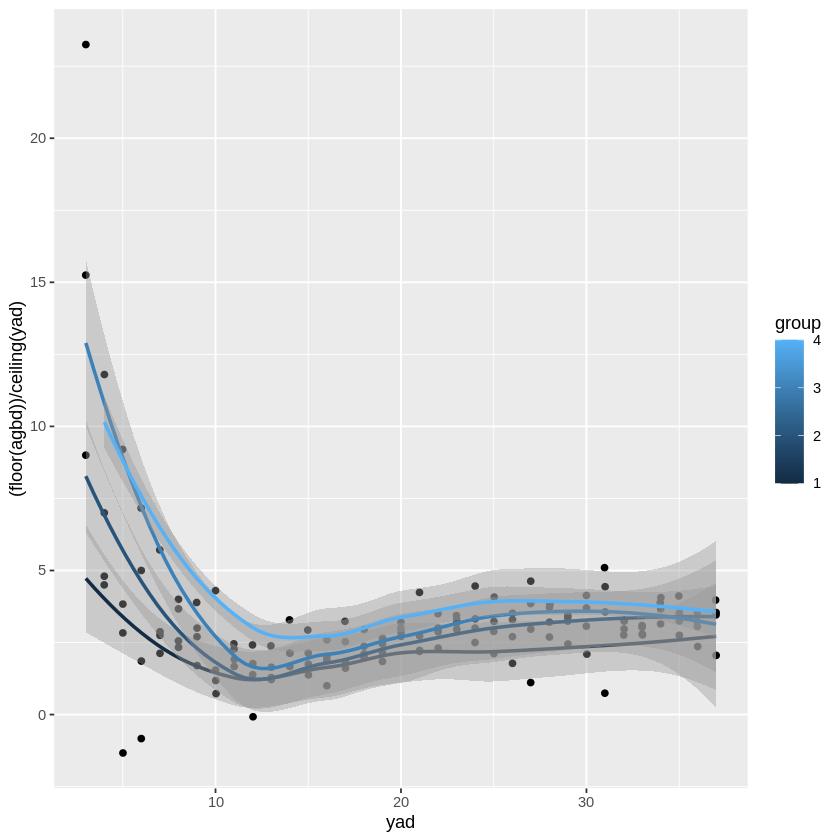

In [145]:
summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group))

In [233]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [185]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% unlist,])

In [222]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

Warning message:
“Removed 7550 rows containing non-finite values (`stat_bin()`).”


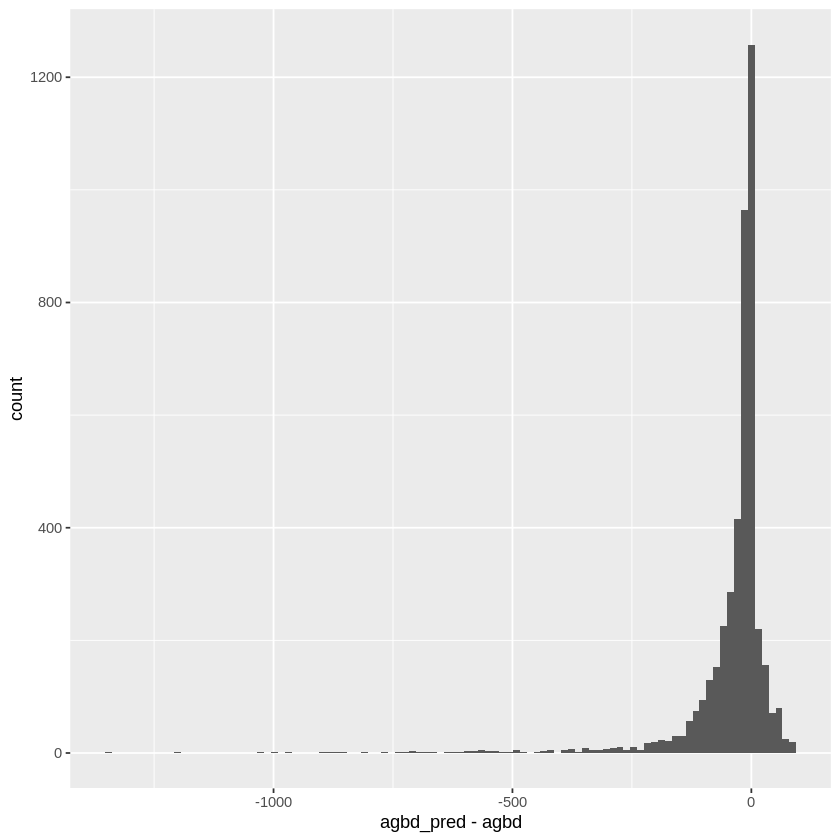

In [234]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [232]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

Warning message in clean_columns(as.data.frame(obj), factorsAsCharacter):
“Dropping column(s) geom_buffer of class(es) sfc_POLYGON;sfc”


Writing layer `example' to data source `/content/example.gpkg' using driver `GPKG'
Writing 12063 features with 52 fields and geometry type Point.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


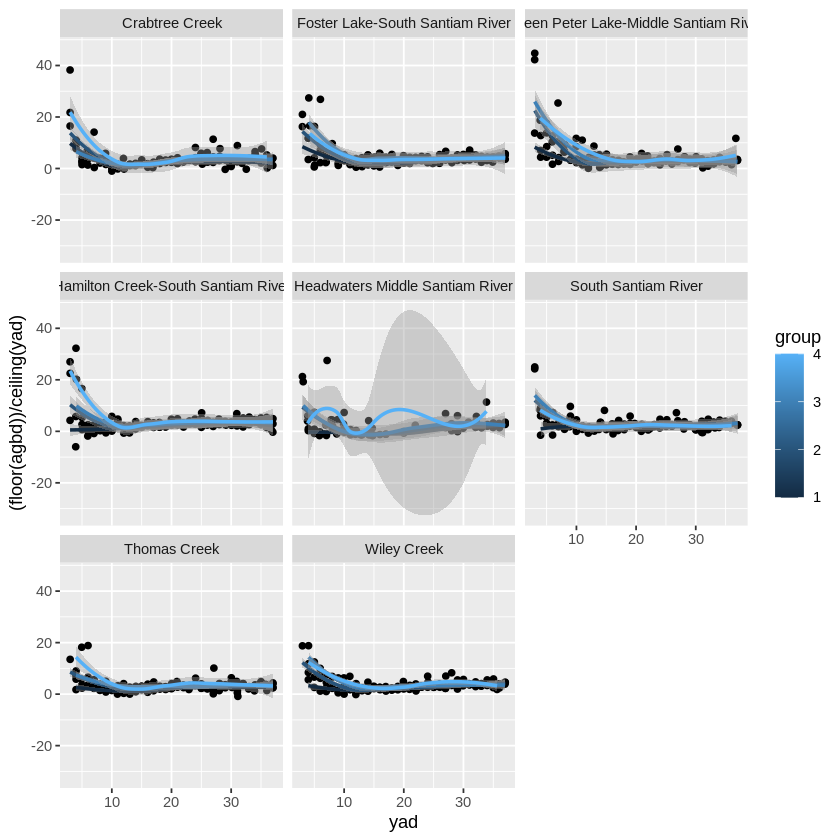

In [197]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric 

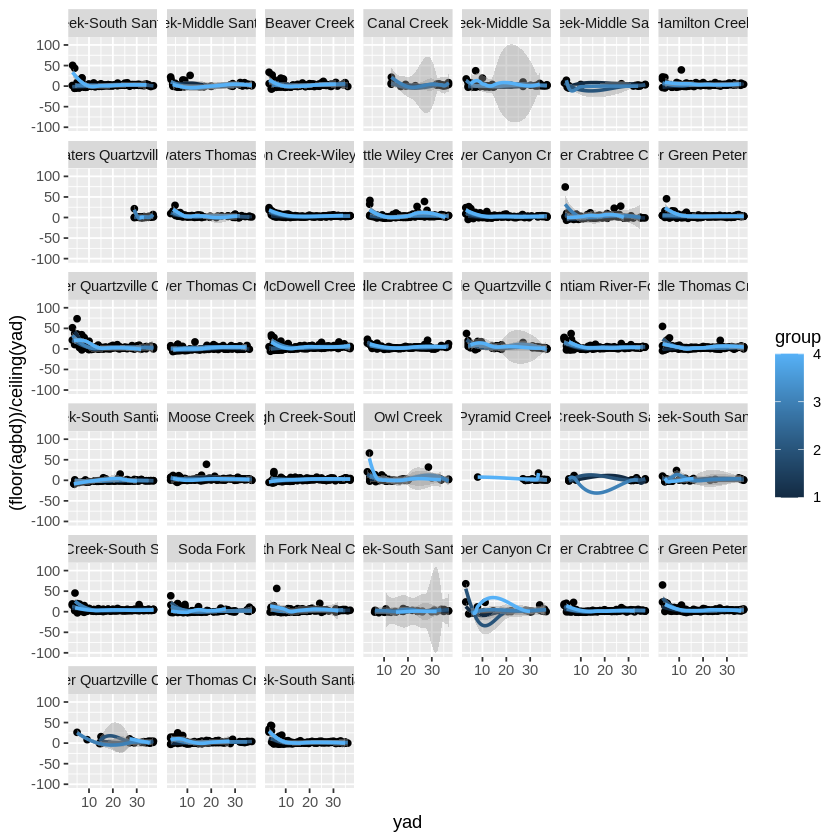

In [201]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)